## 이진분류 손실함수 Binary Cross Entropy


$$
\text{Loss} = -\left[y \cdot \log(p) + (1 - y) \cdot \log(1 - p)\right]
$$
- $y$: 실제 값 (0 또는 1)
- $p$: 예측 확률 (0과 1 사이)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from torch.nn import BCEWithLogitsLoss

In [4]:
# 정답이 1일 때 -log(p)
# - 예측 0.2 : 손실이 크게
# - 예측 0.7 : 손실이 작게
print('정답이 1, 손실이 큰 경우 : ', -np.log(0.2))
print('정답이 1, 손실이 작은 경우 : ', -np.log(0.7))

# 정답이 0일 때 -log(1-p)
# - 예측 0.2 : 손실이 작게
# - 예측 0.7 : 손실이 크게
print('정답이 0, 손실이 작은 경우 : ', -np.log(1 - 0.2))
print('정답이 0, 손실이 큰 경우 : ', -np.log(1 - 0.7))


정답이 1, 손실이 큰 경우 :  1.6094379124341003
정답이 1, 손실이 작은 경우 :  0.35667494393873245
정답이 0, 손실이 작은 경우 :  0.2231435513142097
정답이 0, 손실이 큰 경우 :  1.203972804325936


In [5]:
# 직접 구현
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8 # 0.00000001
    # log에 0이 들어올 경우를 방지하기 위한 앱실론
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.1, 0.8, 0.7]) # sigmoid(logit)한 결과값 (==> 이라고 가정)

loss = binary_cross_entropy(y_true, y_pred)
loss
# => np.float64(0.19763486939016456)

np.float64(0.19763486939016456)

In [ ]:
# torch 손실함수 BCELoss
y_true = torch.tensor([1, 0, 1, 1], dtype=torch.float32)
y_pred = torch.tensor([0.9, 0.1, 0.8, 0.7], dtype=torch.float32)

criterion = nn.BCELoss()
loss = criterion(y_pred, y_true)
# 주의!! : y_pred 먼저 줘야 한다
loss
# => tensor(0.1976)

In [ ]:
# torch 손실함수 BCEWithLogitsLoss
# 입력 : logits
# - BCELoss의 확률값이 0, 1 에 가까우면 수치계산이 불안정했고, 이를 보안한 손실함수


logits = torch.tensor([2.173, -2.345, 1.345, -0.343]) # 출력층 선형방정식 결과값 (==>가정)
y_true = torch.tensor([1, 0, 1, 1], dtype=torch.float32)

# sigmoid + BCELoss
p = torch.sigmoid(logits)
criterion = nn.BCELoss()
loss = criterion(p, y_true)
print(loss)
# => tensor(0.3275)

# BCEWithLogitsLoss
criterion2 = nn.BCEWithLogitsLoss()
loss = criterion2(logits, y_true)
print(loss)
# => tensor(0.3275)

In [ ]:
# 손실함수 시각화
p = np.linspace(0.01, 0.99, 100) # 시그모이드 통과한 확률값 (==> 가정)

loss_1 = -np.log(p)
loss_0 = -np.log(1 - p)

plt.plot(p, loss_1, label='y=1')
plt.plot(p, loss_0, label='y=0')

plt.title('Binary Cross Entropy Loss')
plt.xlabel('p')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

## 다중분류 손실함수 Cross Entropy
모델이 출력한 점수(logits)를 softmax 함수로 확률로 바꾼 뒤, 정답 클래스의 log 확률을 취한 값을 손실로 계산한다.


$$
\text{Loss} = -\log(\text{softmax}(\text{logits})[y])
$$


**수식 전체**


$$
\text{Loss} = -\log\left( \frac{e^{z_y}}{\sum_{j} e^{z_j}} \right)
$$


* $z = [z_0, z_1, ..., z_k]$: 각 클래스에 대한 모델의 출력값 (logits)
* $z_y$: 정답 클래스 $y$에 해당하는 로짓 값
* $\sum_j e^{z_j}$: 모든 클래스에 대한 softmax 분모


In [ ]:
# 직접 구현

y_true = 0 # 0번지 클래스
z = torch.tensor([2.0, 1.0, 0.1])
p = F.softmax(z, dim=0)
print(p) # => tensor([0.6590, 0.2424, 0.0986])
pred = p.argmax(dim=0)
print(pred) # => tensor(0)

loss = -np.log(p.numpy()[y_true]) # 정답인 클래스에 대한 확률값
print(loss) # => 0.41702995

In [ ]:
# troch의 CrossEntropyLoss
y_true = torch.tensor([0], dtype=torch.long)  # long만 허용!!
z = torch.tensor([2.0, 1.0, 0.1])

criterion = nn.CrossEntropyLoss()
loss = criterion(z, y_true)
print(loss) # => tensor(0.4170)
print(loss.item()) # => 0.4170299470424652

In [ ]:
# 손실함수 시각화
p = np.linspace(0.01, 0.99, 100)

# 실제 정답 1(정답 클래스만 확인)
loss = -np.log(p)

plt.plot(p, loss, label='target-p')

plt.title('Cross Entropy Loss')
plt.xlabel('p')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

## 회귀 손실함수


**1. MSELoss (Mean Squared Error Loss)**


**정의**: 오차(예측 - 실제)의 **제곱** 평균값을 계산


**특징**: 큰 오차에 더 큰 패널티 → 이상치에 민감


**수식**


$$
\text{MSELoss} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


**2. L1Loss 또는 MAELoss (Mean Absolute Error Loss)**


**정의**: 오차(예측 - 실제)의 **절댓값** 평균


**특징**: 이상치에 덜 민감하지만, 미분 불연속점 존재


**수식**


$$
\text{MAELoss} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


**3. HuberLoss (Smooth L1 Loss)**


**정의**: 작은 오차에는 MSE처럼, 큰 오차에는 MAE처럼 동작


**특징**: 이상치에 덜 민감하면서도 미분 가능 → **타협형 손실함수**


**수식** (임계값 $\delta$를 기준으로 나뉨)


$$
\text{HuberLoss}(y_i, \hat{y}_i) =
\begin{cases}
\frac{1}{2}(y_i - \hat{y}_i)^2 & \text{if } |y_i - \hat{y}_i| \leq \delta \\
\delta \cdot \left( |y_i - \hat{y}_i| - \frac{1}{2}\delta \right) & \text{otherwise}
\end{cases}
$$


[ 0.5 -0.5 -0.1 -0.8]


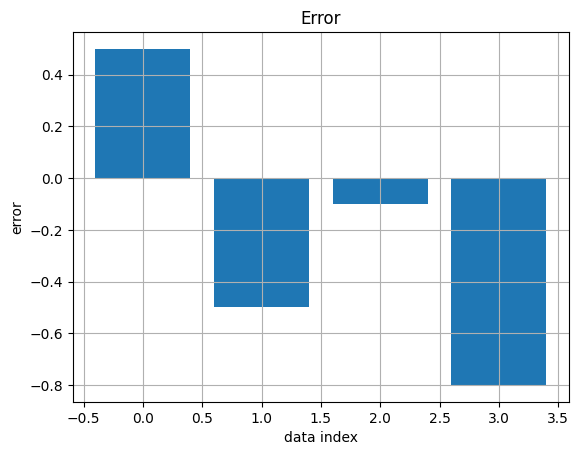

In [8]:
# 이상치가 없는 경우
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8])
error = y_true - y_pred
print(error) # => [ 0.5 -0.5 -0.1 -0.8]


plt.bar(range(4), error)
plt.title("Error")
plt.xlabel('data index')
plt.ylabel('error')
plt.grid()
plt.show()

[ 0.5 -0.5 -0.1 -0.8 35.5 52.3]


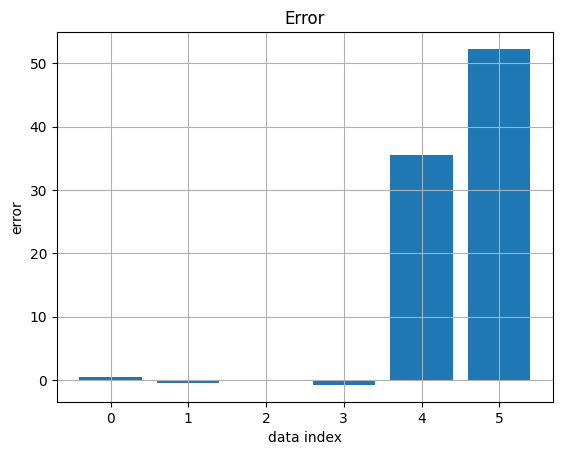

In [9]:
# 이상치가 있는 경우
y_true = np.array([3.0, -0.5, 2.0, 7.0, 50.5, 60.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8, 15, 7.7])
error = y_true - y_pred
print(error) # => [ 0.5 -0.5 -0.1 -0.8]


plt.bar(range(6), error)
plt.title("Error")
plt.xlabel('data index')
plt.ylabel('error')
plt.grid()
plt.show()

In [12]:
# 손실함수별 비교
def mse(y_true, y_pred) :
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred) :
    return np.mean(np.abs(y_true - y_pred))

def huber_loss(y_true, y_pred, delta=1.0) :
    """
    delta 보다 작은 오차에는 MSE 처럼,
    delta 보다 큰 오차에는 MAE 처럼 작동한다.
    """
    error = y_true - y_pred
    is_small_error = error <= delta
    return np.mean(
        np.where(is_small_error,
            0.5 * (error ** 2),
            delta * (np.abs(error) - 0.5 * delta)
        )
    )

y_true = np.array([3.0, -0.5, 2.0, 7.0, 50.5, 60.0])
y_pred = np.array([2.5, 0.0, 2.1, 7.8, 15, 7.7])

print('mse : ', mse(y_true, y_pred))
print('mae : ', mae(y_true, y_pred))
print('huber_loss : ', huber_loss(y_true, y_pred))
# => mse :  666.1149999999999
# => mae :  14.949999999999998
# => huber_loss :  14.5625

mse :  666.1149999999999
mae :  14.949999999999998
huber_loss :  14.5625


In [ ]:
# torch 버전
y_true = torch.tensor([3.0, -0.5, 2.0, 7.0, 50.5, 60.0])
y_pred = torch.tensor([2.5, 0.0, 2.1, 7.8, 15, 7.7])

# ==>  nn.MSELoss()(y_true, y_pred) 같은 모양 : 객체를 먼저 만들고 그 뒤에 값을 넘겨줌
print('mse : ', F.mse_loss(y_true, y_pred), nn.MSELoss()(y_true, y_pred))
print('mae : ', F.l1_loss(y_true, y_pred), nn.L1Loss()(y_true, y_pred))
print('huber_loss : ', F.huber_loss(y_true, y_pred), nn.HuberLoss()(y_true, y_pred))
print('smooth_l1_loss : ', F.smooth_l1_loss(y_true, y_pred), nn.SmoothL1Loss()(y_true, y_pred))
# => mse :  tensor(666.1150) tensor(666.1150)
# => mae :  tensor(14.9500) tensor(14.9500)
# => huber_loss :  tensor(14.5625) tensor(14.5625)
# => smooth_l1_loss :  tensor(14.5625) tensor(14.5625)

In [ ]:
# 시각화
errors = torch.linspace(-5, 5, 100)

# 손실함수 객체
mse_fn = nn.MSELoss(reduction='none') # reduction='mean'  여러 오차를 평균내어 스칼라 반환
mae_fn = nn.L1Loss(reduction='none') # reduction='none' 여러 오차를 그대로 반환
huber_fn = nn.HuberLoss(reduction='none') # ==> 기본값 reduction='mean'

# 정답 / 예측
y_true = torch.zeros_like(errors)
# ==> errors와 똑같은 모양의 차원(shape)을 만들어서 전부 0으로 채우겠다
y_pred = errors


# 손실계산
mse_loss = mse_fn(y_pred, y_true).numpy()
mae_loss = mae_fn(y_pred, y_true).numpy()
huber_loss = huber_fn(y_pred, y_true).numpy()

mse_loss
# => tensor(8.5017)


# 시각화
plt.plot(errors, mse_loss, label='mse')
plt.plot(errors, mae_loss, label='mae')
plt.plot(errors, huber_loss, label='huber')

plt.title('Regression Loss Functions')
plt.legend()
plt.xlabel('error')
plt.ylabel('loss')
plt.grid()
plt.show()

## 손실함수에 따른 모델 학습 비교

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

X, y = make_regression(
    n_samples=1000,
    n_features=5,
    noise=30,
    random_state=42
)

print(X.shape, y.shape)
# => (1000, 5) (1000,)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 데이터 전처리
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# => (800, 5) (800, 1)
# => (200, 5) (200, 1)
# ==> .ravel() 적용 후
# => (800, 5) (800,)
# => (200, 5) (200,)


# tensor 준비
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1) # ==> 얕은복사
# view() : 원본 tensor에 대한 참조형식으로 형태 변경
#          (값 변겨이 필요한 경우에는 reshape(값 복사) 사용)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1) # ==> 깊은복사

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# => torch.Size([800, 5]) torch.Size([800])
# => torch.Size([200, 5]) torch.Size([200])
# ==> view 와 reshape 적용 후
# => torch.Size([800, 5]) torch.Size([800, 1])
# => torch.Size([200, 5]) torch.Size([200, 1])

# 모델 생성
# model = nn.Sequential(
#     nn.Linear(5, 1)
# )

loss_fns = {
    'mse': nn.MSELoss(),
    'mae': nn.L1Loss(),
    'huber': nn.HuberLoss(),
}

loss_results = {}

for name, loss_fn in loss_fns.items():
    # print(name, loss_fn)

    model = nn.Linear(5, 1)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    losses = [] # 각 모델별 loss 기록

    # 모델 학습
    model.train()
    for epoch in range(100):
        optimizer.zero_grad()
        pred = model(X_train)
        loss = loss_fn(pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # 모델 평가
    model.eval()
    with torch.no_grad():
        eval_loss_fn = nn.MSELoss()
        pred = model(X_test)
        eval_loss = eval_loss_fn(pred, y_test)
        print(f'{name} : 손실함수 학습 결과 : MSE {eval_loss.item()}')
        loss_results[name] = losses
# => mse : 손실함수 학습 결과 : MSE 0.199203222990036
# => mae : 손실함수 학습 결과 : MSE 0.1970888376235962
# => huber : 손실함수 학습 결과 : MSE 0.1968727558851242



(1000, 5) (1000,)
(800, 5) (800,)
(200, 5) (200,)


In [ ]:
# 시각화
for name, losses in loss_results.items():
    # print(name, losses)
    plt.plot(losses, label=name)

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()